## 2.1 Exploratory Data Analysis

## Question: What is the average birth weight of babies in the USA ? 

[Data Link](https://www.icpsr.umich.edu/icpsradmin/nsfg/variableGroupParent/10262?studyNumber=9999https://www.icpsr.umich.edu/icpsradmin/nsfg/variableGroupParent/10262?studyNumber=9999)

<img src = 'nsfg.jpg' height = '500' width = '500'>

In [161]:
import pandas as pd # Importing pandas 
import numpy as np  # Importing numpy
import seaborn as sns

In [162]:
nsfg = pd.read_hdf('nsfg.hdf5', 'nsfg') 
type(nsfg)

pandas.core.frame.DataFrame

In [163]:
nsfg.head() #Head gives the first 5 records

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [164]:
# Display the number of rows and columns
nsfg.shape

(9358, 10)

In [165]:
# Display the names of the columns
nsfg.columns


Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

Birth Weight in pounds and their count

<img src ='birthwgt_lb1.jpg' height ='500' width = '500'>

In [166]:
pounds = nsfg['birthwgt_lb1'] #accessing the column in the dataframe
type(pounds) #get the type of the column data

pandas.core.series.Series

In [167]:
pounds.head() # shows the first 5 values 

0    5.0
1    4.0
2    5.0
3    NaN
4    8.0
Name: birthwgt_lb1, dtype: float64

In [168]:
# Select column birthwgt_oz1: ounces
ounces = nsfg['birthwgt_oz1']

In [169]:
# Print the first 5 elements of ounces
print(ounces.head())

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


## 2.2 Clean and Validate

In [170]:
pounds.value_counts().sort_index() #Get the values of the weighted sorted by frequency

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

In [171]:
pounds.describe() #Validates the data with the summary

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

In [172]:
pounds = pounds.replace([98, 99], np.nan) #Replaces the values
pounds.mean()

6.703286384976526

In [173]:
pounds.describe()

count    6390.000000
mean        6.703286
std         1.429265
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        17.000000
Name: birthwgt_lb1, dtype: float64

In [174]:
pounds.value_counts().sort_index() #Distribution after the replacement

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
Name: birthwgt_lb1, dtype: int64

In [175]:
ounces.replace([98, 99], np.nan, inplace=True) #Replace the values inplace

In [176]:
birth_weight = pounds + ounces / 16.0
birth_weight.describe()

count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

<img src = 'outcome.jpg' height = '500' width = '500'>

## How many pregnancies in this dataset ended with a live birth?

In [177]:
nsfg['outcome'].value_counts().sort_index()

1    6489
2     947
3      86
4    1469
5     118
6     249
Name: outcome, dtype: int64

## 2.3 Filter and Visualize 

### 2.3.1 Histogram

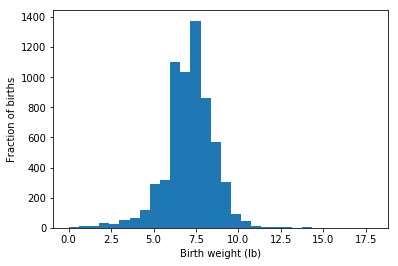

In [178]:
import matplotlib.pyplot as plt
plt.hist(birth_weight.dropna(), bins=30)
plt.xlabel('Birth weight (lb)')
plt.ylabel('Fraction of births')
plt.show()

### 2.3.2 Boolean Series

In [179]:
preterm = nsfg['prglngth'] < 37
preterm.head()

0    False
1     True
2     True
3     True
4    False
Name: prglngth, dtype: bool

In [180]:
preterm.sum() # Count of the pre term babies

3742

In [181]:
preterm.mean() #Mean of the pre term babies

0.39987176747168196

### 2.3.3 Filtering

In [182]:
preterm_weight = birth_weight[preterm]
preterm_weight.mean()

5.577598314606742

In [183]:
full_term_weight = birth_weight[~preterm]
full_term_weight.mean()

7.372323879231473

### How to do the filtering based on two boolean series ?? 

### 2.3.4 Resampling

NSFG is not representative as some groups are oversampled. We can correct using resample_rows_weighted().

In [184]:
nsfg['wgt2013_2015'].value_counts()

1859.105000     158
75399.410000     86
6669.835590      20
5847.837907      15
21910.454185     14
3664.883852      13
5880.430989      13
2854.789239      13
11619.778053     12
8524.963029      12
7103.255889      12
4948.068678      12
41922.386606     12
20498.136783     11
7349.047927      11
11660.528535     11
17909.231379     11
8769.519547      11
2600.993676      11
3513.249968      11
5134.886963      10
5559.686318      10
11304.185576     10
4094.088380      10
5198.390132      10
3653.994653      10
9962.027158      10
2823.280515      10
4787.333209       9
1889.828073       9
               ... 
6060.875020       1
9993.755530       1
16693.739264      1
20690.555572      1
7338.081600       1
9201.887154       1
30795.834705      1
4509.205835       1
2798.180820       1
8272.706841       1
17577.054781      1
15721.567384      1
2195.096676       1
10566.325318      1
3341.633345       1
3502.894544       1
20211.109103      1
3443.389493       1
2636.780984       1


## 2.4 GSS Dataset

<img src = 'gss.jpg' height = '500' width ='500'>

### 2.4.1 Distributions

In [186]:
gss = pd.read_hdf('gss.hdf5', 'gss')

In [187]:
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


In [188]:
educ = gss['educ']

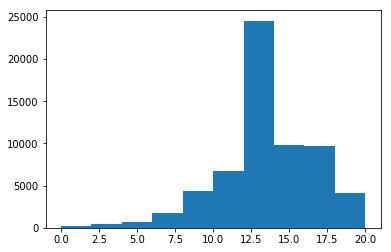

In [189]:
plt.hist(educ.dropna(), label = 'educ')
plt.show()

### Fraction over Frequency


Histograms are not really suitable to visualize the distributions, so how can we handle it ??. In analysis not always we require counts, we shall look for fraction. Histograms makes data into bins and critical information can be overseen.

### 2.4.1.1 PMF (Probability Mass Function)

In [190]:
from empiricaldist import Pmf, Cdf

In [191]:
pmf_educ = Pmf.from_seq(educ, normalize = False)
pmf_educ.head()

0.0    144
1.0     38
2.0    151
3.0    246
4.0    290
Name: educ, dtype: int64

In [192]:
# Twelve years of education
pmf_educ[12]

19145

### 2.4.1.2 CDF (Cummulative Distribution Function)


<img src="pmf_cdf.jpg" width="500" height="500">

<img src="pmf_cdf_example.jpg" width="500" height="500">

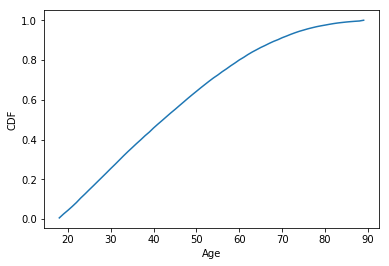

In [193]:
cdf = Cdf.from_seq(gss['age'])
cdf.plot()
plt.xlabel('Age')
plt.ylabel('CDF')
plt.show()

## Evaluating the CDF

In [194]:
q = 51
p = cdf(q)
print(p)

0.6602013455146835


## Evaluating the Inverse CDF

In [195]:
p = 0.25
q = cdf.inverse(p)
print(q)

30.0


## Plotting Multiple PMF

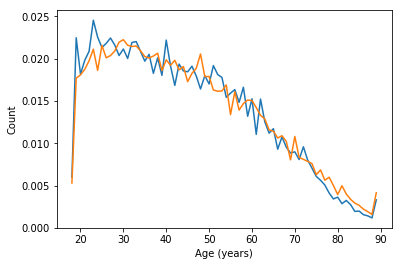

In [196]:
male = gss['sex'] == 1
age = gss['age']
male_age = age[male]
female_age = age[~male]
Pmf.from_seq(male_age).plot(label='Male')
Pmf.from_seq(female_age).plot(label='Female')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

## Plotting Multiple CDF

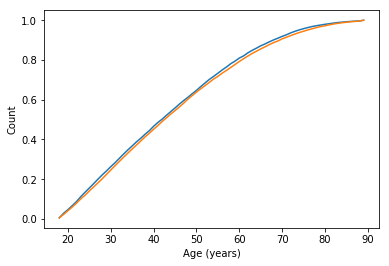

In [227]:
Cdf.from_seq(male_age).plot(label='Male')
Cdf.from_seq(female_age).plot(label='Female')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

## 2.5 Exploring Relationships 

<img src="brfss.jpg" width="500" height="500">

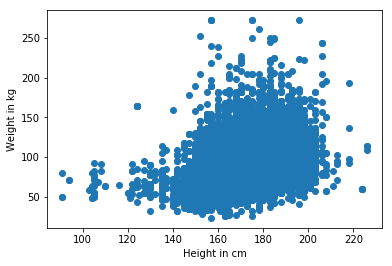

In [228]:
brfss = pd.read_hdf('brfss.hdf5', 'brfss')
height = brfss['HTM4']
weight = brfss['WTKG3']
plt.plot(height, weight, 'o')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

### 2.5.1 Transparency

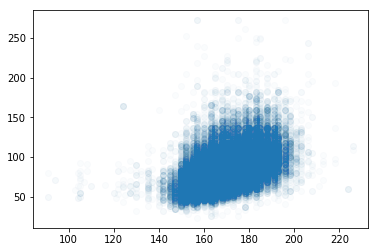

In [229]:
plt.plot(height, weight, 'o', alpha=0.02)
plt.show()

### 2.5.2 Marker size

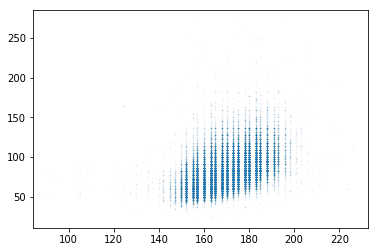

In [230]:
plt.plot(height, weight, 'o', markersize=1, alpha=0.02)
plt.show()

### 2.5.3 Jittering

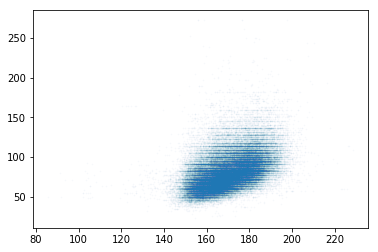

In [231]:
height_jitter = height + np.random.normal(0, 2, size=len(brfss))
plt.plot(height_jitter, weight, 'o', markersize=1, alpha=0.02)
plt.show()

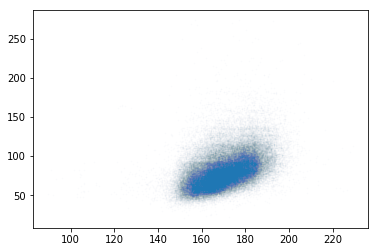

In [232]:
height_jitter = height + np.random.normal(0, 2, size=len(brfss))
weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.01)
plt.show()

### 2.5.4 Zoom

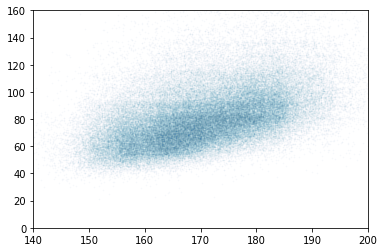

In [233]:
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.02)
plt.axis([140, 200, 0, 160])
plt.show()

### 2.5.5 Visualizing relationships

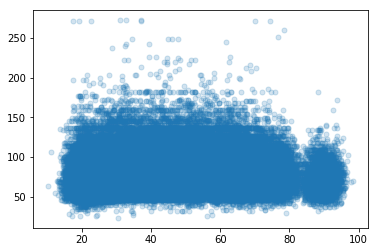

In [234]:
age = brfss['AGE'] + np.random.normal(0, 2.5, size=len(brfss))
weight = brfss['WTKG3']
plt.plot(age, weight, 'o', markersize=5, alpha=0.2)
plt.show()

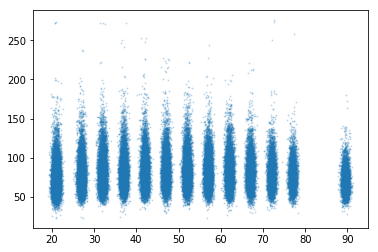

In [235]:
age = brfss['AGE'] + np.random.normal(0, 0.5, size=len(brfss))
weight = brfss['WTKG3'] + np.random.normal(0, 2, size=len(brfss))
plt.plot(age, weight, 'o', markersize=1, alpha=0.2)
plt.show()

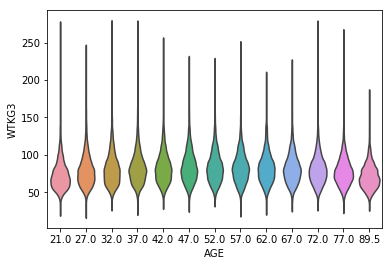

In [236]:
data = brfss.dropna(subset=['AGE', 'WTKG3'])
sns.violinplot(x='AGE', y='WTKG3', data=data, inner=None)
plt.show()

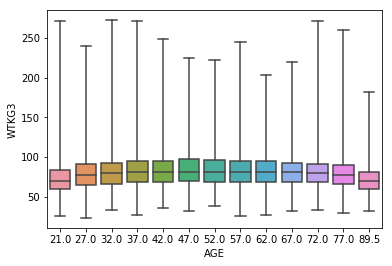

In [237]:
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.show()

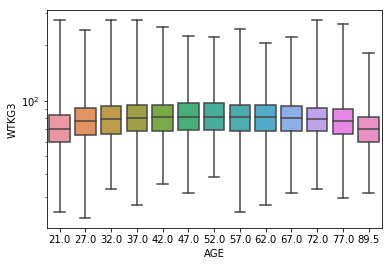

In [238]:
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.yscale('log')
plt.show()

### 2.5.6 Correlation

In [239]:
columns = ['HTM4', 'WTKG3', 'AGE']
subset = brfss[columns]

In [240]:
subset.corr()

,HTM4,WTKG3,AGE
HTM4,1.000000,0.474203,-0.093684
WTKG3,0.474203,1.000000,0.021641
AGE,-0.093684,0.021641,1.000000


In [241]:
xs = np.linspace(-1, 1)
ys = xs**2
ys += np.random.normal(0, 0.05, len(xs))
np.corrcoef(xs, ys)

array([[1.        , 0.01086813],
       [0.01086813, 1.        ]])

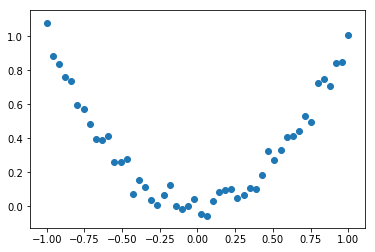

In [242]:
plt.scatter(xs,ys)

### 2.5.7 Strength of effect

In [243]:
from scipy.stats import linregress
subset = brfss.dropna(subset=['WTKG3', 'HTM4'])
xs = subset['HTM4']
ys = subset['WTKG3']
res = linregress(xs, ys)

### Linear Regression 

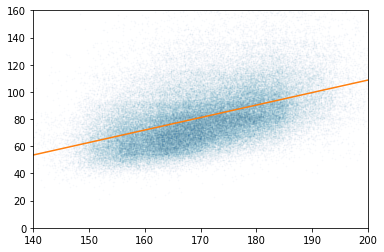

In [244]:
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.02)
plt.axis([140, 200, 0, 160])
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')
plt.show()

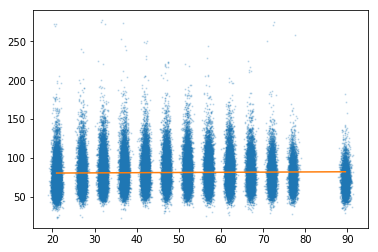

In [245]:
age = brfss['AGE'] + np.random.normal(0, 0.5, size=len(brfss))
weight = brfss['WTKG3'] + np.random.normal(0, 2, size=len(brfss))
plt.plot(age, weight, 'o', markersize=1, alpha=0.2)

subset = brfss.dropna(subset=['WTKG3', 'AGE'])
xs = subset['AGE']
ys = subset['WTKG3']
res = linregress(xs, ys)
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')
plt.show()